In [1]:
import zipfile
import os
import numpy as np
import cv2
from skimage.color import rgb2lab
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# HWData.zip dosyasını çıkartma
zip_path = 'HWData.zip'
extract_path = 'HWData'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)




<ipython-input-2-395d194ac1b2>:26: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  img_hog, _ = hog(img_lab, pixels_per_cell=(8, 8),


Confusion Matrix:
 [[46  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0 11  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  5  0  0  0  0  0]
 [ 5  0  0  0  0  0  0  0  0  0  3  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 5  0  0  0  0  0  0  0  0  0  0  0  3  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  0  5  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  1]]
Accuracy: 0.6141732283464567


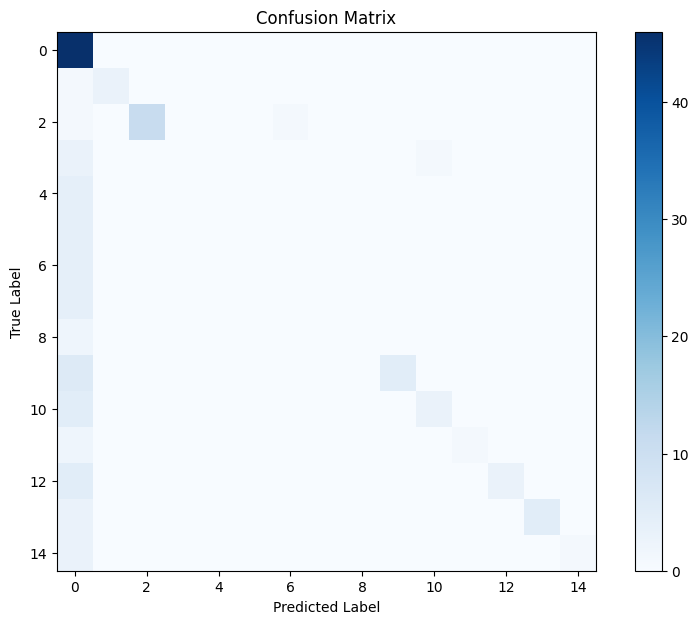

In [2]:
import numpy as np
import cv2
from skimage.color import rgb2lab
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import os

# Veri yollarını belirleme
train_dir = os.path.join('HWData', 'HWData/train')
test_dir = os.path.join('HWData', 'HWData/test')

# Resimleri ve etiketleri yükleme ve özellik çıkarma
def load_data_and_extract_features(data_dir):
    features = []
    labels = []
    for class_dir in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_dir)
        if os.path.isdir(class_path):
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                img = cv2.imread(img_path)
                img = cv2.resize(img, (224, 224))
                img_lab = rgb2lab(img)
                img_hog, _ = hog(img_lab, pixels_per_cell=(8, 8),
                                 cells_per_block=(2, 2), visualize=True, multichannel=True)
                features.append(img_hog)
                labels.append(class_dir)
    return np.array(features), np.array(labels)

# Eğitim ve test verilerini yükleyip özellik çıkarma
X_train, y_train = load_data_and_extract_features(train_dir)
X_test, y_test = load_data_and_extract_features(test_dir)

# SVM ile eğitim ve test
model = svm.SVC(kernel='linear', decision_function_shape='ovr')
model.fit(X_train, y_train)

# Tahminler
y_pred = model.predict(X_test)

# Karışıklık matrisi ve doğruluk hesaplama
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion Matrix:\n', conf_matrix)
print('Accuracy:', accuracy)

# Karışıklık matrisini görselleştirme
plt.figure(figsize=(10, 7))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
